# Machine Learning Assignment 3(Neural Networks)

### Aditya Rathi
### ID-801075901

#### Contents
 
1. Overview
2. Data
3. Method
4. Result
5. Conclusion
6. Refrences




## Overview

* As a part of our assignment we are implementing the Non Linear models on classification and regression data using neural networks.
 * In first we are cleaning and visualizing our data. All the preliminary analysis of our data is done in this section
 * We are using cross validation technique to find the best hyper parameters for our Neural Network model
 * Later on we are implementing the Non-Linear Regression to predict for the regression data using neural network
 * In last part we are implementing the Non-Linear Logistic Regression for the classification data.
 

# Data


## Regression Data

The data I have selected for the regression model is India metro data in which the output is to predict the future traffic based on feature of weather, time, date, holidays, etc. 

Data Source: -
https://www.kaggle.com/umairnsr87/indian-metro-data

Features of the dataset: -

1. date_time: -Date, time, and hour of the data that is collected in the local IST time
2. is_holiday: Categorical Indian national holidays combined with regional holidays
3. air_pollution_index: - Air Quality Index (10-300)
4. humidity: -Numeric humidity in Celsius
5. wind_speed: -Numeric wind speed in miles per hour
6. wind_direction: -Cardinal wind direction (0-360 degree)
7. visibility_in_miles: -Visibility of distance in miles
8. dew_point: -Numeric dew point in Celsius
9. temperature: -Numeric average temperature in Kelvin
10. rain_p_h: -Numeric amount in mm of rain that occurred in the hour
11. snow_p_h:: -Numeric amount in mm of snow that occurred in the hour
12. clouds_all: -Numeric percentage of cloud cover
13. weather_type: -Categorical short textual description of the current weather
14. weather_description: -Categorical longer textual description of the current weather

### Code

#### Reading Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import numpy as np
import warnings
import sklearn.utils
from nn import NeuralNet
from sklearn.metrics import mean_squared_error
import sklearn
from sklearn.model_selection import KFold
import sys
warnings.simplefilter(action='ignore', category=DeprecationWarning)
warnings.simplefilter(action='ignore', category=UserWarning)
warnings.simplefilter(action='ignore', category=SyntaxWarning)
warnings.simplefilter(action='ignore', category=Warning)



In [2]:
df1=pd.read_csv('trafficlear.csv')
df1.head()
weather_mapping = {'Clouds':1, 'Clear':2, 'Rain':3, 'Drizzle':4, 'Mist':5, 'Haze':6, 'Fog':7,'Thunderstorm':8, 'Snow':9, 'Squall':10, 'Smoke':11}
df1['weather_type'] = df1['weather_type'].map(weather_mapping)
weather_description={'scattered clouds':1, 'broken clouds':2, 'overcast clouds':3,'sky is clear':4, 'few clouds':5, 'light rain':6,'light intensity drizzle':7, 'mist':8, 'haze':9, 'fog':10,       'proximity shower rain':11, 'drizzle':12, 'moderate rain':13,       'heavy intensity rain':14, 'proximity thunderstorm':15,       'thunderstorm with light rain':16, 'proximity thunderstorm with rain':17,       'heavy snow':18, 'heavy intensity drizzle':19, 'snow':20,       'thunderstorm with heavy rain':21, 'freezing rain':22, 'shower snow':23,       'light rain and snow':24, 'light intensity shower rain':25, 'SQUALLS':26,       'thunderstorm with rain':27, 'proximity thunderstorm with drizzle':28,       'thunderstorm':29, 'Sky is Clear':30, 'very heavy rain':31,       'thunderstorm with light drizzle':32, 'light snow':33,       'thunderstorm with drizzle':34, 'smoke':35, 'shower drizzle':36,       'light shower snow':37, 'sleet':38}
df1['weather_description']=df1['weather_description'].map(weather_description)
holiday={'None':0, 'Columbus Day':1, 'Veterans Day':1, 'Thanksgiving Day':1,       'Christmas Day':1, 'New Years Day':1, 'Washingtons Birthday':1,       'Memorial Day':1, 'Independence Day':1, 'State Fair':1, 'Labor Day':1,       'Martin Luther King Jr Day':1}
df1['is_holiday']=df1['is_holiday'].map(holiday)
time={'09:00:00':9, '10:00:00':10, '11:00:00':11, '12:00:00':12, '13:00:00':13,       '14:00:00':14, '15:00:00':15, '16:00:00':16, '17:00:00':17, '18:00:00':18,      '19:00:00':19, '20:00:00':20, '21:00:00':21, '22:00:00':22, '23:00:00':23,       '00:00:00':0, '01:00:00':1, '02:00:00':2, '03:00:00':3, '04:00:00':4,       '05:00:00':5, '06:00:00':6, '08:00:00':8, '07:00:00':7}
df1['time']=df1['time'].map(time)
t=pd.to_datetime(df1['date'])
df1['new_date']=t
k=df1['new_date'].map(dt.datetime.toordinal)
df1['to_date']=k
df1.head()
df=df1.copy()
D_re=df1.copy()
df

,Unnamed: 0,is_holiday,air_pollution_index,humidity,wind_speed,wind_direction,visibility_in_miles,dew_point,temperature,rain_p_h,snow_p_h,clouds_all,weather_type,weather_description,traffic_volume,date,time,new_date,to_date
0,0,0,121,89,2,329,1,1,288.28,0.0,0.0,40,1,1,5545,2012-10-02,9,2012-10-02,734778
1,1,0,178,67,3,330,1,1,289.36,0.0,0.0,75,1,2,4516,2012-10-02,10,2012-10-02,734778
2,2,0,113,66,3,329,2,2,289.58,0.0,0.0,90,1,3,4767,2012-10-02,11,2012-10-02,734778
3,3,0,20,66,3,329,5,5,290.13,0.0,0.0,90,1,3,5026,2012-10-02,12,2012-10-02,734778
4,4,0,281,65,3,329,7,7,291.14,0.0,0.0,75,1,2,4918,2012-10-02,13,2012-10-02,734778
5,5,0,23,65,3,328,6,6,291.72,0.0,0.0,1,2,4,5181,2012-10-02,14,2012-10-02,734778
6,6,0,184,64,3,328,7,7,293.17,0.0,0.0,1,2,4,5584,2012-10-02,15,2012-10-02,734778
7,7,0,167,64,3,327,7,7,293.86,0.0,0.0,1,2,4,6015,2012-10-02,16,2012-10-02,734778
8,8,0,119,63,3,327,6,6,294.14,0.0,0.0,20,1,5,5791,2012-10-02,17,2012-10-02,734778
9,9,0,161,63,3,326,3,3,293.10,0.0,0.0,20,1,5,4770,2012-10-02,18,2012-10-02,734778


### Visualization

We are going to use first 10000 data points for easy computation of the data visualization

In [3]:
D=df.head(10000)

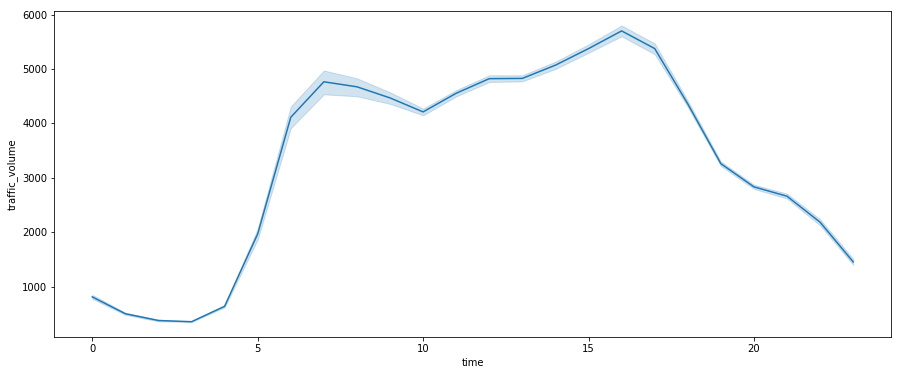

In [4]:
plt.figure(figsize=(15,6))
sns.lineplot(x="time", y="traffic_volume", data=D)

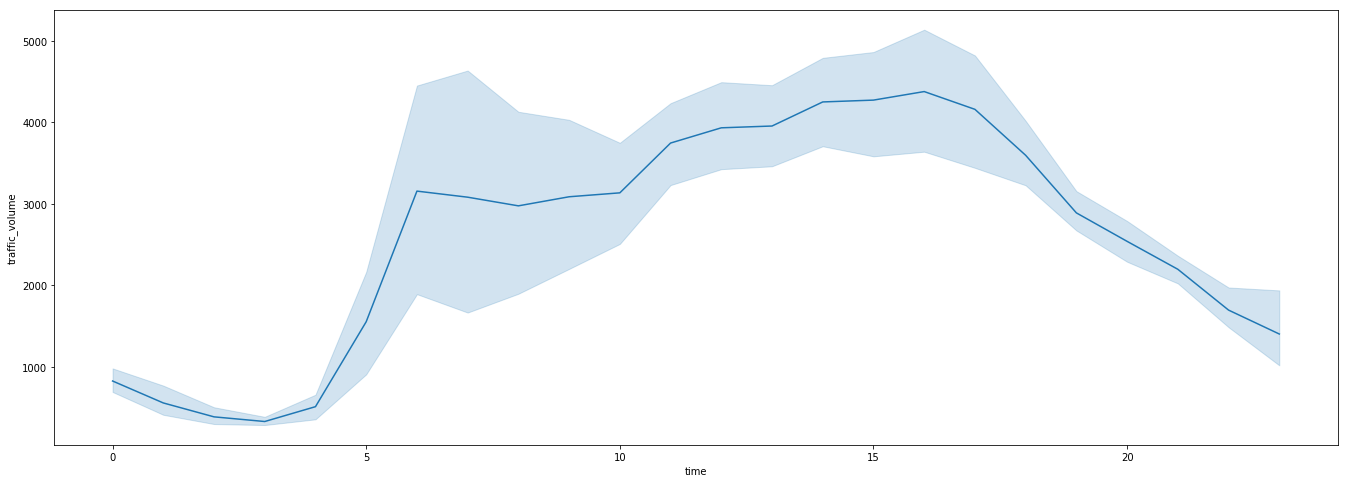

In [5]:
K=D[D['is_holiday']!=0]
#K
plt.figure(figsize=(23,8))
sns.lineplot(x="time", y="traffic_volume",data=K)

In the above observation we get to know the average traffic volume with respect to time of the day. From the line graph observation we know that the traffic volume starts to increase from early morning and it gets reduced by midnight 


The second figure(a single day of holiday not all) is when I have given a traffic data when there is a holiday so you can determine from the difference of the two figures is there is a drop of traffic during the afternoon time of the day. As it is a holiday people may be avoiding to commute this time of the day

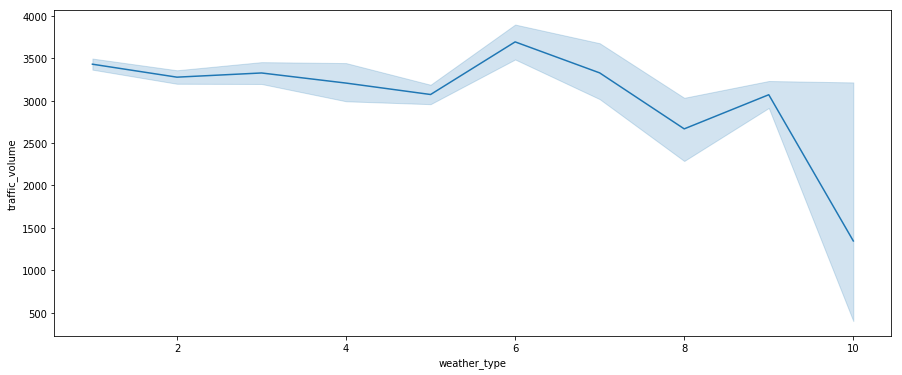

In [6]:
plt.figure(figsize=(15,6))
sns.lineplot(x="weather_type", y="traffic_volume", data=D)

from the above visualization we get to know the traffic volume based on the weather type we can see the volume of traffic decreases during squall and thunderstorm

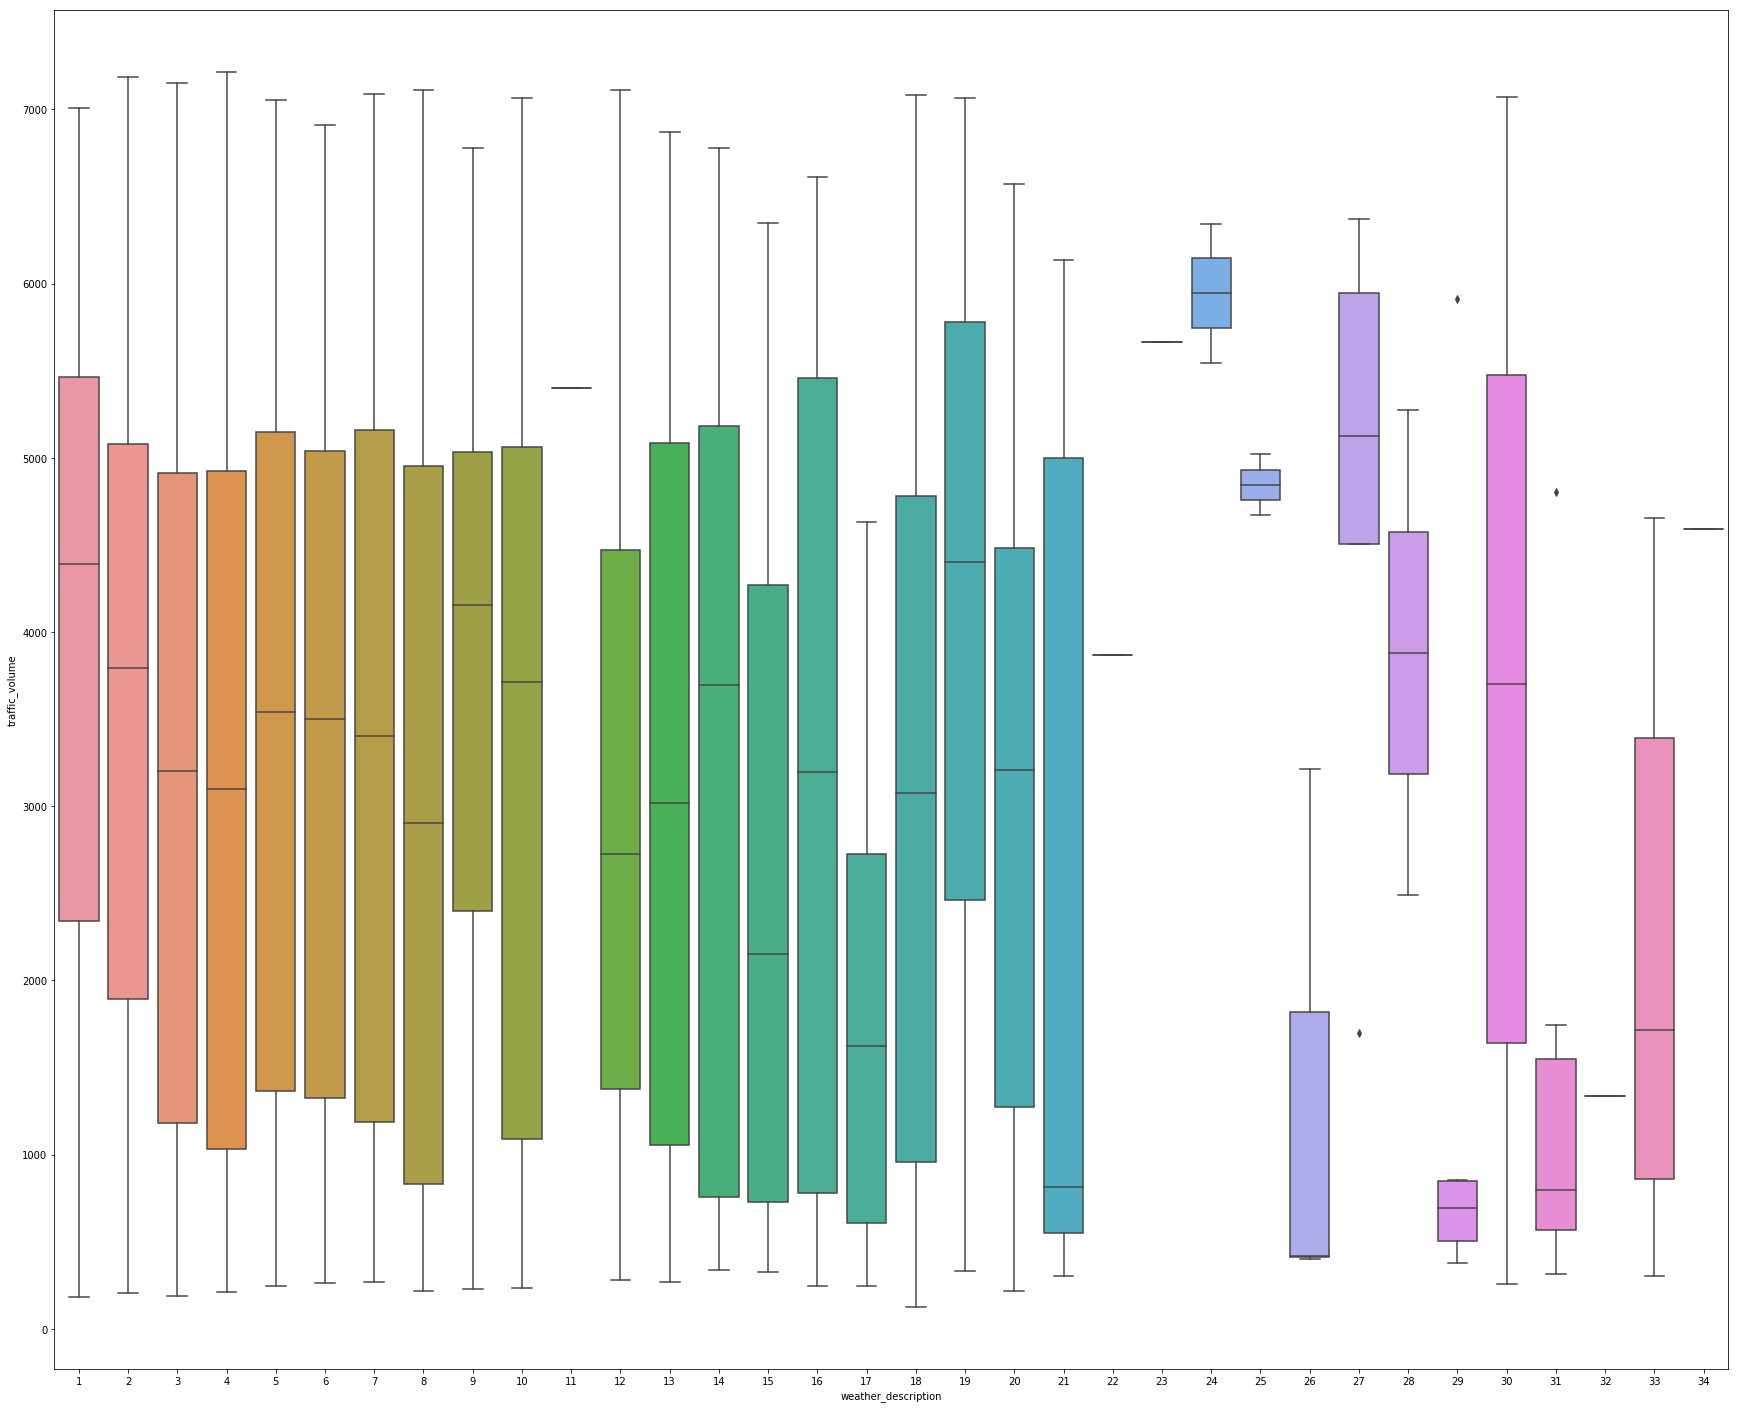

In [7]:
plt.figure(figsize=(30,25))
sns.boxplot(x='weather_description', y='traffic_volume', data=D)

from the above we can get the mean, median of the traffic volume with respect to the weather description. 

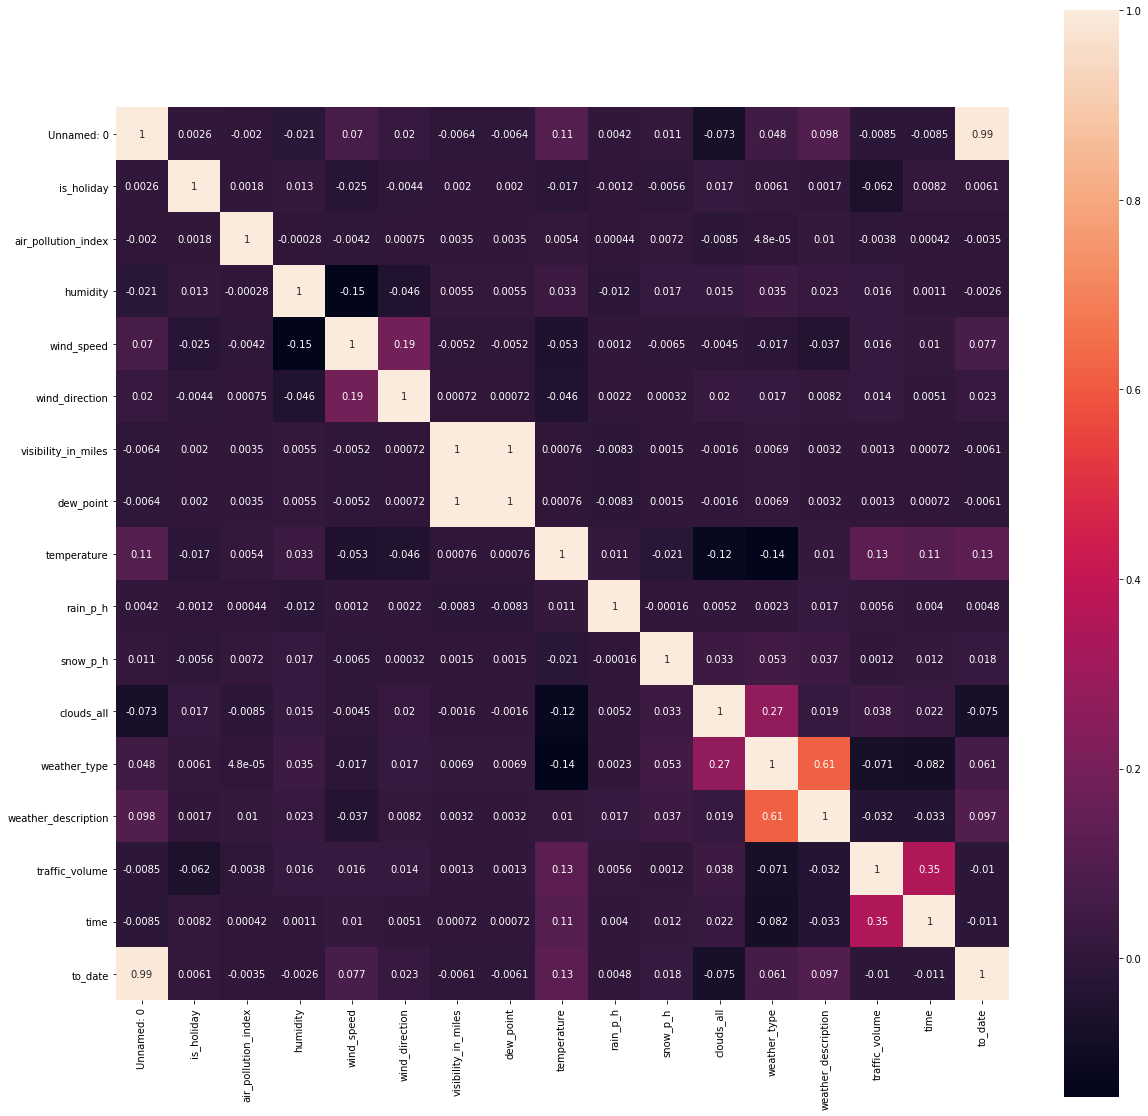

In [8]:
f = plt.subplots(figsize=(20, 20))
corr = df.corr()
sns.heatmap(data=corr, square=True, annot=True,cbar=True)
plt.show()

from the above coorelation we can see that traffic volume has negative coorelation with is_holiday, weather_type, weather_description it states that the traffic volume decreases with respect to the values in other column. And conversely we see positive coorelation between the traffic volume and time which is clear the traffic volume increases with respect to time of the day. There are even other things like traffic volume positive coorelation with temperature i.e the traffic volume increases when there is a good temperature and reduces when temperature outside is less. 

### Preliminary observation

1. We got to know the traffic volume of the vehicle with respect to each hour of the day giving us a basic shape of the line going down in the midnight to early dawn. 
2. Second is the weather type forcing the less number of vehicle during thunderstorms or squall and even during the mist the vehicular traffic is going down. 
3. During the sky when it is clear we get to see most of the traffic volume from the box plot visualization
4. From the data which was grouped just during the rain weather type we get to see that during light rain and proximity shower rain the vehicular traffic is more compared to the other forms of rain

## Classification Data

The data which I chose for this assignment belongs to the bank marketing data. Banking being an important field classification model can help us explore new scenarios in this data. Modeling based can help us explore new feature in this data.

#### Data Source: 

https://archive.ics.uci.edu/ml/datasets/Bank+Marketing

The main thing of marketing of a product is to call the customer and explain them the product. The call can be done in a few attempts. The main output for this is to predict whether the bank customer after receiving the call buy the product from the marketing team. The classification model will help us analyse which customer would buy the product. 

#### Features

Input variables:

bank client data:

1. - age (numeric)
2. - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3. - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4. - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5. - default: has credit in default? (categorical: 'no','yes','unknown')
6. - housing: has housing loan? (categorical: 'no','yes','unknown')
7. - loan: has personal loan? (categorical: 'no','yes','unknown')
 
related with the last contact of the current campaign:

8. - contact: contact communication type (categorical: 'cellular','telephone')
9. - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10. - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11. - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

other attributes:

12. - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13. - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14. - previous: number of contacts performed before this campaign and for this client (numeric)
15. - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

social and economic context attributes

16. - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17. - cons.price.idx: consumer price index - monthly indicator (numeric)
18. - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19. - euribor3m: euribor 3 month rate - daily indicator (numeric)
20. - nr.employed: number of employees - quarterly indicator (numeric)



### Code

#### Reading the Data

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv('bank-additional-full.csv',sep=';')
df1=df.copy(deep=True)
df.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [10]:
print(df.head())
df1.columns = [c.replace('.', '_') for c in df1.columns]
job_map={'housemaid':1, 'services':2, 'admin.':3, 'blue-collar':4, 'technician':5,'retired':6, 'management':7, 'unemployed':8, 'self-employed':9, 'unknown':10,'entrepreneur':11, 'student':12}
df1['job']=df1['job'].map(job_map)
marital_map={'married':1, 'single':2, 'divorced':3, 'unknown':4}
df1['marital']=df1['marital'].map(marital_map)
education_map={'basic.4y':1, 'high.school':2, 'basic.6y':3, 'basic.9y':4,'professional.course':5, 'unknown':6, 'university.degree':7,     'illiterate':8}
df1['education']=df1['education'].map(education_map)
default_map={'no':1, 'unknown':3, 'yes':2}
df1['default']=df1['default'].map(default_map)
housing_map={'no':1, 'yes':2, 'unknown':3}
df1['housing']=df1['housing'].map(housing_map)
loan_map={'no':1, 'yes':2, 'unknown':3}
df1['loan']=df1['loan'].map(loan_map)
contact={'telephone':1, 'cellular':2}
df1['contact']=df1['contact'].map(contact)
month={'may':5, 'jun':6, 'jul':7, 'aug':8, 'oct':10, 'nov':11, 'dec':12, 'mar':3, 'apr':4,'sep':9}
df1['month']=df1['month'].map(month)
day={'mon':1, 'tue':2, 'wed':3, 'thu':4, 'fri':5}
df1['day_of_week']=df1['day_of_week'].map(day)
poutcome={'nonexistent':1, 'failure':2, 'success':3}
df1['poutcome']=df1['poutcome'].map(poutcome)
y={'no':0, 'yes':1}
df1['y']=df1['y'].map(y)



   age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon ...         1    999         0  nonexistent          1.1   
1   may         mon ...         1    999         0  nonexistent          1.1   
2   may         mon ...         1    999         0  nonexistent          1.1   
3   may         mon ...         1    999         0  nonexistent          1.1   
4   may         mon ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  

### Visualization of Data

We are going to use python libraries like seaborn, matplotlib, etc to visualize the classification data. We can get a better understanding of the features we want classify using this libraries.

In [11]:
D=df1.head(10000)
D_Classification=df1.copy()
groupName = []                                   
count = []
for group_name, subset in D.groupby('education'):
    groupName.append(group_name)
    count.append(len(subset))
print(groupName)
print(count)

[1, 2, 3, 4, 5, 6, 7, 8]
[1299, 2382, 761, 1820, 1142, 485, 2109, 2]


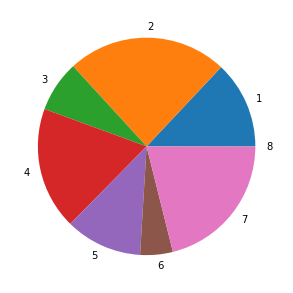

In [12]:
plt.figure(figsize = (5, 5))
plt.pie(count, labels = groupName)
plt.show()

The pie chart helps us to know what is the education level of the people in the dataset

<Figure size 1080x432 with 0 Axes>

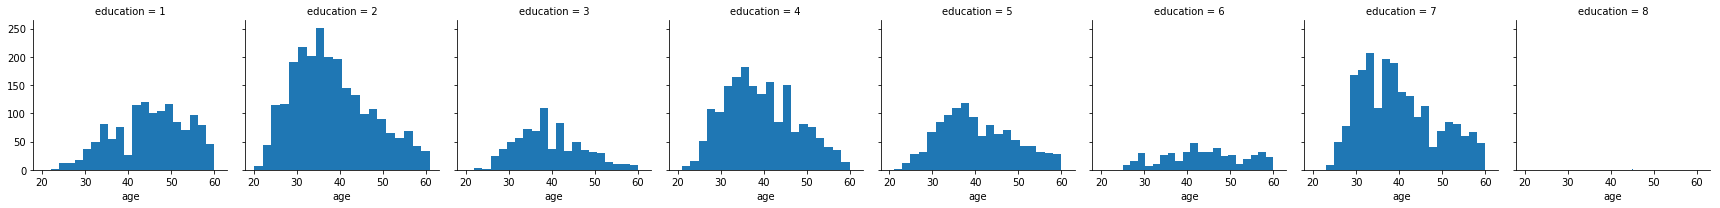

In [13]:
plt.figure(figsize=(15,6))
g = sns.FacetGrid(D, col='education')
g.map(plt.hist, 'age', bins=20)

This visualization was done to plot the histogram of people with age group with respect to the education they have. There is two figures with education to high school and university degree are major showcase from this visualization

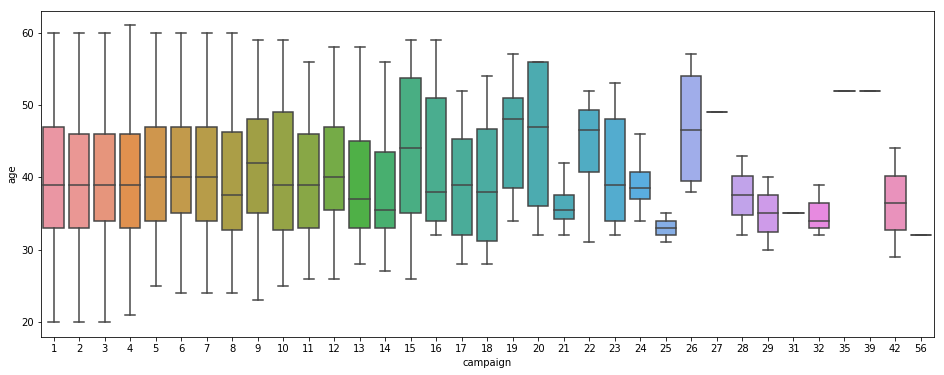

In [14]:
plt.figure(figsize=(16, 6))
sns.boxplot(x='campaign', y='age', data=D)

This Visualization was done to show the campaign of calls (nos.of calls) done by marketing team to customer based on their age group

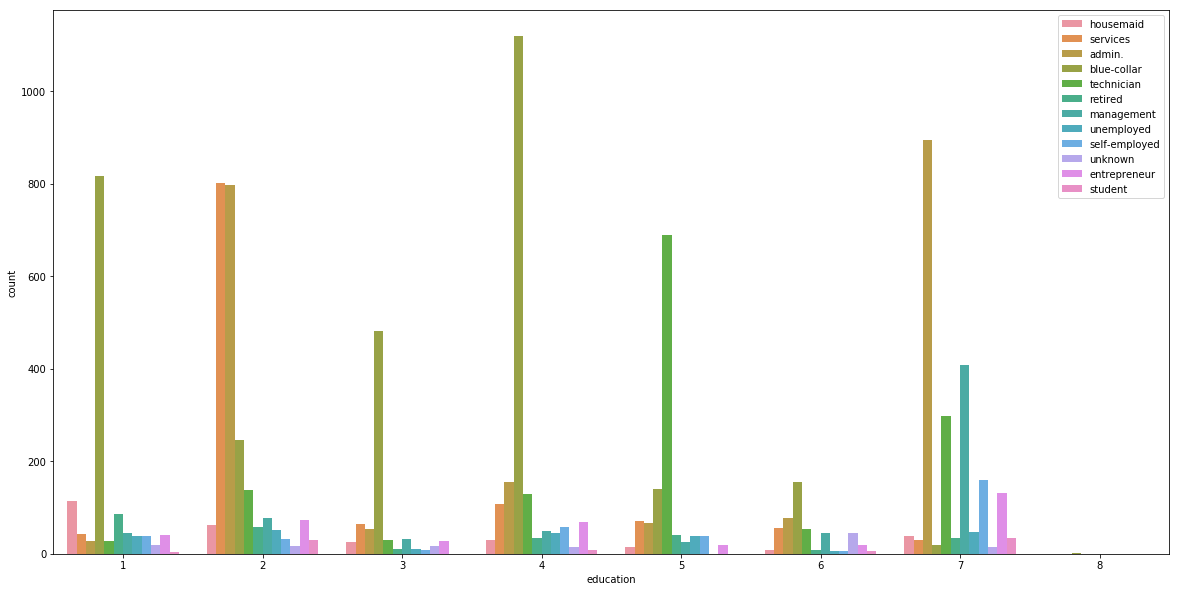

In [15]:
fig = plt.subplots(figsize=(20,10))
sns.countplot(D['education'],hue=D['job'])
plt.legend(loc='upper right', labels=['housemaid', 'services', 'admin.', 'blue-collar', 'technician',       'retired', 'management', 'unemployed', 'self-employed', 'unknown',       'entrepreneur', 'student'])

The bargraph shows the count of people with respect to education and job type they are doing.

<Figure size 1440x1368 with 0 Axes>

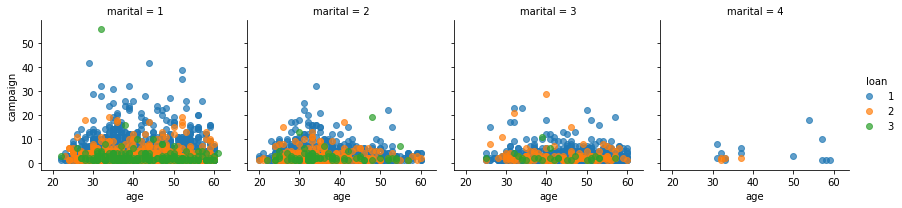

In [16]:
plt.figure(figsize=(20,19))
g = sns.FacetGrid(D, hue="loan", col="marital")
g.map(plt.scatter, "age", "campaign", alpha=.7)
g.add_legend();

Visualization of the campaign of calls done to people based on their marital status and the loan if they have any.

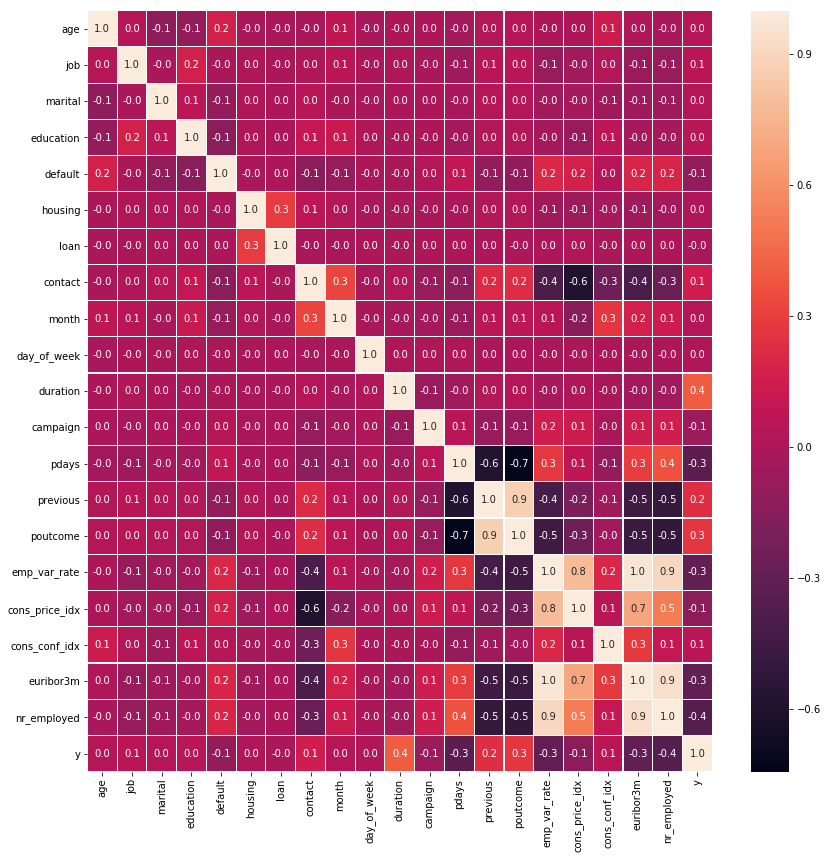

In [17]:
plt.subplots(figsize=(14, 14))
sns.heatmap(df1.corr(), annot=True, linewidths=.1,fmt= '.1f')
plt.show()

### Preliminary observation

1. From the pie chart we got to know that majority of the people are literate with a basic high school education. 
2. Vast majority of people have education in two types i.e High School and University degree compared to others.
3. The box plot gives us the around 15 or 16 calls to middle age group of people 40 t0 60yrs.
4. People with university degree are vast majority working as services and technicians or are self employed. And starting education with basic 4 year to 9 year college majority of people work as blue collar jobs.
5. The last is people whose marital status is not known doesnot have a loan with them or only few people have a loan on themselves.
6. People who are married and doesn't have a loan gets more number call for the marketing of this product compared to people with unknown loan status get only few calls.
7. The heat map gives us a good idea about all the correleation between the features we can use during our classification problem.


### III Method

#### III.A 5-fold Cross Validation

Cross-validation is a resampling procedure used to evaluate machine learning models on a limited data sample. The procedure has a single parameter called k that refers to the number of groups that a given data sample is to be split into. As such, the procedure is often called k-fold cross-validation. When a specific value for k is chosen, it may be used in place of k in the reference to the model, such as k=10 becoming 10-fold cross-validation.

The general procedure is as follows:

1. Shuffle the dataset randomly.
2. Split the dataset into k groups
3. For each unique group:
     1. Take the group as a hold out or test data set
     2. Take the remaining groups as a training data set
     3. Fit a model on the training set and evaluate it on the test set
4. Retain the evaluation score and discard the model
5. Summarize the skill of the model using the sample of model evaluation scores

In summary, cross-validation combines (averages) measures of fitness in prediction to derive a more accurate estimate of model prediction performance.

In [18]:
### REGRESSION DATA
df=D_re.copy()

#### Implementation of K-fold 

In [19]:
import sklearn.utils

def k_folds(df, folds):
    #equal divide of list
    rnum = 1/folds;
    #multiply the folds in the list
    ratio = [rnum] * folds
    #check whether the sum is 1
    assert(np.sum(ratio) == 1)
    #for shuffling
    df = sklearn.utils.shuffle(df)
    #resetting the index
    df = df.reset_index(drop=True)
    X = df.iloc[:, :-1]
    T =df.iloc[:, -1]
    N = X.shape[0]
    #print(N)
    Xc = []
    Tc = []
    i = 0  
    r = 1/5
    # number of rows
    nrows = int(round(N * r))  
    #print(nrows)
    for k in range(len(ratio)):
        
        Xc.append(X.iloc[i:i+nrows, :])
        Tc.append(T.iloc[i:i+nrows, ])
        i += nrows    
    return Xc, Tc


In [20]:
df=df.sample(10000)
X = df[['temperature','weather_type','time','is_holiday','weather_description','to_date']].copy()
mux = np.mean(X,0)  
sigmax = np.std(X,0)
X= (X - mux) / sigmax 
print(X.shape)
T = df[['traffic_volume']].copy()
mu = np.mean(T,0)  
sigma = np.std(T,0)
T = (T - mu) / sigma 
T= T.values.reshape(T.shape[0],1)
print(T.shape)

(10000, 6)
(10000, 1)


In [21]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, T, test_size=0.2, random_state=0)


### III B. Non-Linear Regression

Used the neural net class given to us.

#### Summary Non Linear Regression 

- In the below section we are implementing the Non Linear Regression using Neural Network. Non-linear regression model converts the raw data 'X' to the nonlinear mapping. 
- An activation function is used to do this nonlinear mapping of the data. We have actually choosen sigmoid function over other polynomial function. The problem for other polynomial function is that they take a large step for a small amount gradient descent. 
- The forward and backward pass is used to make the adjustments of the weights considering the errors being made in the layers. 
- Nonlinear regression modeling is similar to linear regression modeling in that both seek to graphically track a particular response from a set of variables. Nonlinear models are more complicated than linear models to develop because the function is created through a series of approximations (iterations) that may stem from trial-and-error.



###### Explanation of Codes

##### Neural Net Class
- init() 
 - This function initializes all the necessary variables for building a neural network and for the working of it. 
- add_ones():
 - This function is used to add bias term to the inpurt matrix and the weights.
- pack() and unpack()
 - This function actually packs the multiple weights in to one vector vice a versa is the unpack function
- RDF()
 - This is the activation function which have been used in the neural net class
- get_nlayers() and set_hunit()
 - This function are used to get the hidden layers and the number of layers in the Neural Net class
- train()
 - It preprocesses the inputs and then trains it. This function is also recursive function which calls itself. The target data that is being passed to this function is an indicator matrix which represents of the classes of the data in separate columns.
- use()
 - The test data is passed to this function for making the predictions.
 




#### Implementation of Non Linear Regression

In [25]:
def cross_validation(x_data,ydata,nfolds,layers):
    errors = []
    testErrs = []
    x_data=x_data[0:1000].values   
    i = 0
    #print(x_data)
    
    if len(x_data)/nfolds >= 1 and len(ydata)/nfolds >= 1:
        kf = KFold(n_splits = nfolds)
        
    for train_index, test_index in kf.split(x_data):
        
        residual=[]
        para=[]
        kf_val = KFold(n_splits = nfolds-1)
        x_temp = x_data[train_index]
        #print(x_temp)
        X_train_cv = np.array(x_data)[train_index]
        X_test_cv = np.array(x_data)[test_index]
        #print(x_train_cv)
        #print(x_test_cv)    
        Y_train_cv = np.array(ydata)[train_index]
        #print(Y_train_cv)
        Y_test_cv = np.array(ydata)[test_index]
        #print(Y_test_cv)
        
        for train_index_val,validation_index in kf_val.split(x_temp):

            Xtrainnew = np.array(x_temp)[train_index_val]
            Xvalnew = np.array(x_temp)[validation_index]
            #print(Xtrainnew)
            #print(Xvalnew)
            Ytrainnew = np.array(ydata)[train_index_val]
            #print(Ytrainnew)
            Y_val_new = np.array(ydata)[validation_index]
            #print(Y_val_new)
            max_acc = 0
            n_col=np.array(x_data.shape)[1]
            for neurons in layers:
                net = NeuralNet([n_col,neurons,1])
                net.train( Xtrainnew, Ytrainnew)
                classes = net.use(Xvalnew)
                #print(classes)
                accuracy = 100 - np.mean(np.abs(Y_val_new - classes)) * 100
                if accuracy > max_acc:
                    max_acc = accuracy 
                
                residual.append(accuracy)
                para.append(neurons)
                
                
        print(i+1,"th iteration done")
        i+=1
        best_accuracy = max(residual)
        #print(best_accuracy)
        minimumIndex = residual.index(best_accuracy)
        #print(minimumIndex)
        weight = para[minimumIndex]
        #print(weight)
        
        
        errors.append([weight,best_accuracy])
        print(errors)
        print("-----------------------------")
                
        net_cv = NeuralNet([n_col,weight,1])
        net_cv.train(X_train_cv, Y_train_cv)
        classes = net_cv.use(X_test_cv)
        test_err = 100 - np.mean(np.abs(Y_test_cv - classes))
        testErrs.append([weight,test_err])
                
        #plt.title('Iteration Result')
        fig,ax = plt.subplots()
        
        #ScatterPlot for all the data
        ax.scatter(Y_val_new,classes,edgecolors=(0,0,1),marker=">")
        ax.plot([Y_val_new.min(),Y_val_new.max()],[Y_val_new.min(),Y_val_new.max()],'-.',lw=5)
        ax.set_xlabel('Measured values')
        ax.title.set_text('Iteration Result')
        #ax.title('Iteration Result')
        ax.set_ylabel('Predicted values')
        plt.show()
    
    return testErrs

1 th iteration done
[[8, 12.673445803617682]]
-----------------------------


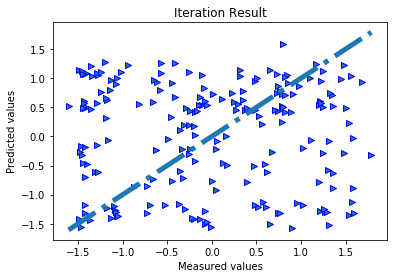

2 th iteration done
[[8, 12.673445803617682], [8, 9.408521544513633]]
-----------------------------


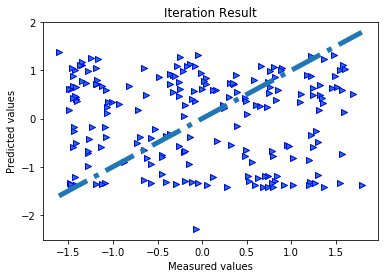

3 th iteration done
[[8, 12.673445803617682], [8, 9.408521544513633], [9, 22.74318019433352]]
-----------------------------


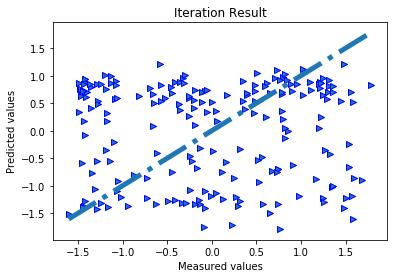

4 th iteration done
[[8, 12.673445803617682], [8, 9.408521544513633], [9, 22.74318019433352], [8, 43.3766224980673]]
-----------------------------


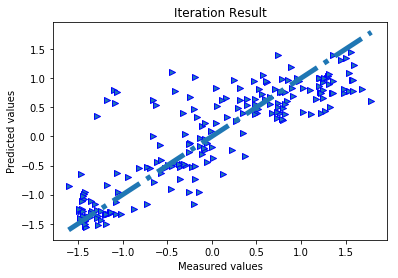

5 th iteration done
[[8, 12.673445803617682], [8, 9.408521544513633], [9, 22.74318019433352], [8, 43.3766224980673], [7, 62.98742736077972]]
-----------------------------


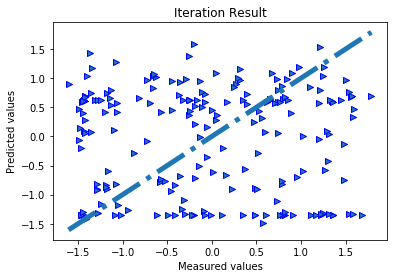

In [26]:
layers=[8,7,12,13,9]
cross=cross_validation(X,T,5,layers)

In [27]:

X_train = X[0:2000]
T_train = T[0:2000]
#print("Train Shape Check:", X_train.shape, T_train.shape)
X_test = X[0:1000]
T_test = T[0:1000]
#print("Test Shape Check:", X_test.shape, T_test.shape)
n_col=np.array(X_train.shape)[1]
best_para = max(cross,key = lambda x:x[1])
final_train_nn = NeuralNet([n_col,best_para[0],1])
final_train_nn.train(X_train, T_train,ftracep=True)
predicted_values,Z = final_train_nn.use(X_test,retZ=True)
acc = 100 - np.mean(np.abs(T_test - predicted_values)) *100
rmse_error =np.sqrt(np.sum((T_test-predicted_values)**2))
print("RMS error :",rmse_error)
print("Accuracy is :",acc)

RMS error : 15.081717056801489
Accuracy is : 67.40312760487257


### Presentation of Cross-Validation Result

Text(0.5, 1.0, 'CV Result')

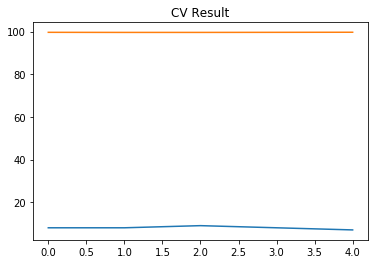

In [28]:
plt.plot(cross)
plt.title('CV Result')

### Plots for Result

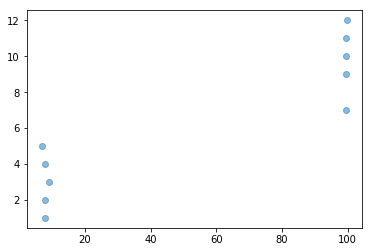

In [29]:
M= [(1,7),(2,9),(3,10),(4,11),(5,12)]
plt.scatter(cross, M, alpha=0.5)
plt.show()

###### Plot for RMSE

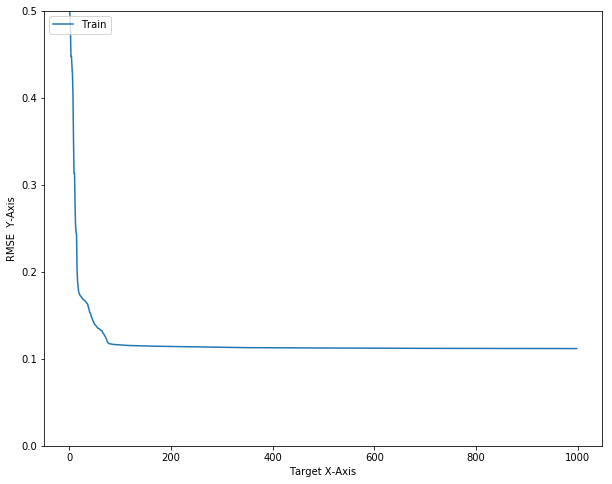

In [31]:
plt.figure(figsize=(10,8))
plt.plot(final_train_nn.ftrace)
plt.ylim(0,0.5)
plt.xlabel('Target X-Axis')
plt.ylabel('RMSE  Y-Axis')
plt.legend(('Train','Test'),loc='upper left')

###### Actual V/s Predicted

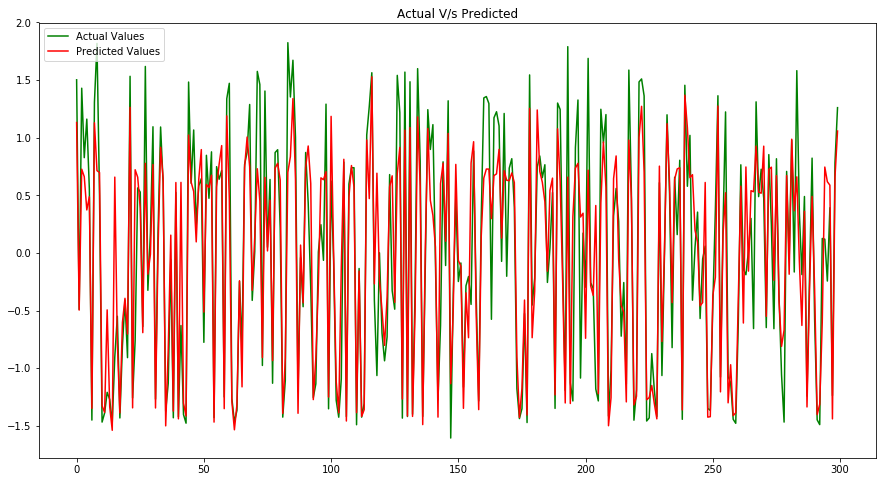

In [32]:
plt.figure(figsize=(15,8))
plt.plot(T_test[500:800],'-g',label='Actual Values')
plt.plot(predicted_values[500:800],'-r',label='Predicted Values')
plt.title('Actual V/s Predicted')
plt.legend(loc='upper left')

### III C. Non Linear Logistic Regression

###### Summary of Non Linear Logistic Regression

- Below we have implemented non linear logistic regression model for classification data using neural network. Neural network converts the raw data 'x' in to the non linear mapping.
- It uses an activation function to do this mapping (h(.)). We choose sigmoid functions over Polynomial functions, cause gradient descent for polynomial functions takes huge steps for large values. This makes the model unstable, whereas gradient descent with sigmoid takes small gradient for nonlinear region.Thus, the model remains more stable.
- We use Forward and Backward pass for the model to adjust the weights of each layer by calculating errors. Depending on the optimization function choice Scaled Conjugate Gradient (scg) or Steepest Descent, the function is optimized(altered to reduce error rate).
- By using this softmax function, we were able to generate probablistic outputs for all classes. To handle multi-label classes, we use the indicator target labels for training to update the weights for the linear model. Following the derivation, we have achieved the following update rule:
$$
w_j \leftarrow wv_j + \alpha \sum_{n=1}^{N} \Big( t_{n,j} - g_j(x_n)\Big) x_n.
$$



### Explanation of NonLinear Logistic Regression

##### NeuralNetLogReg Class

###### Explanation of Codes

##### Neural Net Class
- init() 
 - This function initializes all the necessary variables for building a neural network and for the working of it. 
- add_ones():
 - This function is used to add bias term to the inpurt matrix and the weights.
- pack() and unpack()
 - This function actually packs the multiple weights in to one vector vice a versa is the unpack function
- RDF()
 - This is the activation function which have been used in the neural net class
- get_nlayers() and set_hunit()
 - This function are used to get the hidden layers and the number of layers in the Neural Net class
- train()
 - It preprocesses the inputs and then trains it. This function is also recursive function which calls itself. The target data that is being passed to this function is an indicator matrix which represents of the classes of the data in separate columns.
- use()
 - The test data is passed to this function for making the predictions.



In [33]:
from nn import NeuralNet

class NeuralNetLogReg(NeuralNet):
    """ Nonlinear Logistic Regression
    """

    # if you think, you need additional items to initialize here,
    # add your code for it here
    def __init__(self, nunits):
        NeuralNet.__init__(self,nunits)

   
    def softmax(self,z):
        if not isinstance(z, np.ndarray):
            z = np.asarray(z)
            #print(z)
        f = np.exp(z) 
        #print(f)
        return f / (np.sum(f, axis=1, keepdims=True) if len(z.shape) == 2 else np.sum(f)) 
    # Looking at the final summary or comparison table in lecture note,
    # add your codes for forward pass for logistic regression
    def forward(self, X):
        t,z = NeuralNet.forward(self,X)
        return self.softmax(t),z

    # This is the error function that we want to minimize
    # what was it? take a look at the lecture note to fill in
    def _objectf(self, T, Y, wpenalty):
        epsilon=1e-12
    
        Y = np.clip(Y, epsilon, 1. - epsilon)
        #print(Y)
        N = Y.shape[0]
        #print(N)
        ce = -np.sum(np.sum(T*np.log(Y+1e-9)))
        #print(ce)
        return ce

    # you must reuse the NeuralNet train since you already modified
    # the objective or error function (maybe both), 
    # you do not have many to change here.
    # MAKE SURE convert a vector label T to indicator matrix and 
    # feed that for training
    def train(self, X, T, **params):
        NeuralNet.train(self,X,T)

    # going through forward pass, you will have the probabilities for each label
    # now, you can use argmax to find class labels
    # return both label and probabilities        
    def use(self, X):
        Xs = X
        #print(Xs)
        classes, probabilities = self.forward(Xs)
        #print(classes,probabilities)
        if self.stdT is None:
            classes = self.stdT.unstandardize(classes)
            #print(classes)
        return np.argmax(classes,1),probabilities,classes

#### Examination of correct implementation (NonlinearLogReg) with toy data

In [63]:
N1 = 50
N2 = 50
N = N1 + N2
D = 2
K = 2
mu1 = [-1, -1]
cv1 = np.eye(2)
mu2 = [2,3]
cv2 = np.eye(2) * 3
#print(cov2)

Text(0.5, 1.0, 'training data set')

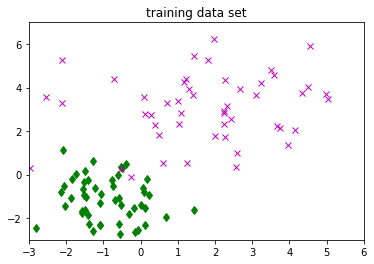

In [64]:
C1 = np.random.multivariate_normal(mu1, cv1, N1)
C2 = np.random.multivariate_normal(mu2, cv2, N2)
#print('first data',C1)
#print('Second Data',C2)
plt.plot(C1[:, 0], C1[:, 1], 'dg')
plt.plot(C2[:, 0], C2[:, 1], 'xm')
plt.xlim([-3, 6])
plt.ylim([-3, 7])
plt.title("training data set")

Text(0.5, 1.0, 'test data set')

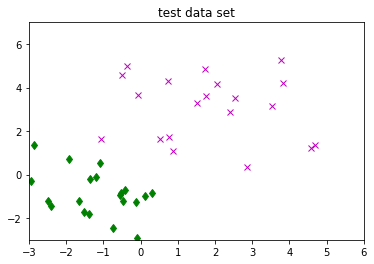

In [65]:
Xtrain = np.vstack((C1, C2))
Ttrain = np.zeros((N, 1))
Ttrain[50:, :] = 1  # labels are zero or one

means, stds = np.mean(Xtrain, 0), np.std(Xtrain, 0)
# normalize inputs
Xtrains = (Xtrain - means) / stds

#
#  Test Data
#
Ct1 = np.random.multivariate_normal(mu1, cv1, 20)
Ct2 = np.random.multivariate_normal(mu2, cv2, 20)

Xtest = np.vstack((Ct1, Ct2))
Ttest = np.zeros((40, 1))
Ttest[20:, :] = 1

# normalize inputs
Xtests = (Xtrain - means) / stds


plt.figure()
plt.plot(Ct1[:, 0], Ct1[:, 1], 'dg')
plt.plot(Ct2[:, 0], Ct2[:, 1], 'xm')

plt.xlim([-3, 6])
plt.ylim([-3, 7])
plt.title("test data set")

In [66]:
clsf = NeuralNetLogReg([2, 3, 2])
clsf.train(Xtrain, Ttrain)
classes, Y, Z = clsf.use(Xtest)

#### Toy Data Output Result

Accuracy:  82.5 %


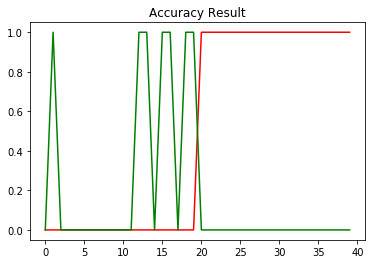

In [67]:
plt.plot(Ttest,'-r')
plt.title("Accuracy Result")
plt.plot(classes,'-g')

Tl = np.argmax(Ttest,1)

print("Accuracy: ", 100 - np.mean(np.abs(Tl - classes)) * 100, "%")

In [43]:
import sklearn
from sklearn.model_selection import KFold
def cross_validations(x_data,ydata,nfolds,layers):
    errors = []
    testErrs = []
    x_data=x_data[0:1000] 
    i = 0
    #print(x_data)
    if len(x_data)/nfolds >= 1 and len(ydata)/nfolds >= 1:
        kf = KFold(n_splits = nfolds)
    
    for train_index, test_index in kf.split(x_data):
        residual=[]
        para=[]    
       
        kf_val = KFold(n_splits = nfolds-1)
        x_temp = x_data[train_index]   
        #print(x_temp)
        X_train_cv = np.array(x_data)[train_index]
        X_test_cv = np.array(x_data)[test_index]
        #print(x_train_cv)
        #print(x_test_cv)
        Y_train_cv = np.array(ydata)[train_index]
        Y_test_cv = np.array(ydata)[test_index]
        #print(Y_train_cv)
        #print(Y_test_cv)
        
        for train_index_val,validation_index in kf_val.split(x_temp):

            Xtrainnew = np.array(x_temp)[train_index_val]
            Xvalnew = np.array(x_temp)[validation_index]
            #print(new)
            Ytrainnew = np.array(ydata)[train_index_val]
            Y_val_new = np.array(ydata)[validation_index]
            
            n_col=np.array(x_data.shape)[1]
            for neurons in layers:
                net = NeuralNetLogReg([n_col,neurons,2])
                net.train(Xtrainnew, Ytrainnew)
                classes,q,w = net.use(Xvalnew)
                accuracy = 100 - np.mean(np.abs(Y_val_new - classes)) * 100
                residual.append(accuracy)
                para.append(neurons)
                
                
        print(i+1,"th iteration is completed")
        i+=1
        #print(residual)
        best_accuracy = max(residual)
        #print(best_accuracy)
        minimumIndex = residual.index(best_accuracy)
        #print(minimumIndex)
        weight = para[minimumIndex]
        #print(weight)
        errors.append([weight,best_accuracy])
        print(errors)
        print("--------------------------------")
        net_cv = NeuralNetLogReg([n_col,weight,2])
        net_cv.train(X_train_cv, Y_train_cv)
        classes,q,w = net_cv.use(X_test_cv)
        test_err = 100 - np.mean(np.abs(Y_test_cv - classes))
        testErrs.append([weight,test_err])
        
    
    return testErrs

In [50]:
df=D_Classification.copy()
df=df.sample(10000)


def normalize(X):
    return (X/X.max())

X = df[["job","education","housing",'marital','duration']].values #'default',,'contact','duration',"age"
T=df[['y']].values

#X=normalize(X)
mux = np.mean(X,0)  
sigmax = np.std(X,0)
X= (X - mux) / sigmax 

T=normalize(T)

# mu = np.mean(T,0)  
# sigma = np.std(T,0)
# T = (T - mu) / sigma 
# T= T.values.reshape(T.shape[0],1)

from sklearn.model_selection import train_test_split
X_train, X_test, T_train, T_test = train_test_split(X, T, test_size=0.7, random_state=42)

In [51]:
layers=[10,23,13,14,8]
cross=cross_validations(X_train,T_train,5,layers)
print(cross)

1 th iteration is completed
[[23, 89.5]]
--------------------------------
2 th iteration is completed
[[23, 89.5], [13, 88.0]]
--------------------------------
3 th iteration is completed
[[23, 89.5], [13, 88.0], [23, 88.0]]
--------------------------------
4 th iteration is completed
[[23, 89.5], [13, 88.0], [23, 88.0], [10, 88.0]]
--------------------------------
5 th iteration is completed
[[23, 89.5], [13, 88.0], [23, 88.0], [10, 88.0], [8, 88.0]]
--------------------------------
[[23, 99.3252], [13, 99.44075], [23, 99.1808], [10, 99.85], [8, 99.1846]]


### Presentation of Cross-Validation Result

[[23, 99.3252], [13, 99.44075], [23, 99.1808], [10, 99.85], [8, 99.1846]]


Text(0.5, 1.0, 'CV Result')

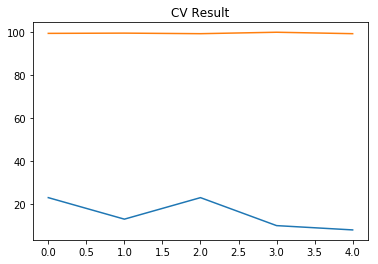

In [52]:
print(cross)
plt.plot(cross)
plt.title('CV Result')

In [53]:
n_col=np.array(X_train.shape)[1]
best_para = max(cross,key = lambda x:x[1])
final_train = NeuralNetLogReg([n_col,best_para[0],2])
final_train.train(X_train, T_train,ftracep=True)
predicted_values,q,w = final_train.use(X_test)
acc = 100 - np.mean(np.abs(T_test - predicted_values)) *100
rmse_error =np.sqrt(np.sum((T_test-predicted_values)**2))
print("RMS error is :",rmse_error)
print("Accuracy is :",acc)

RMS error is : 6400.717928482711
Accuracy is : 16.3894081632653


### Plots for Result

Text(0.5, 1.0, 'Actual V/S Predicted')

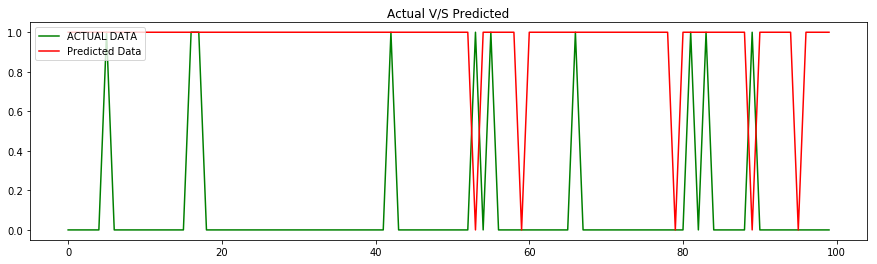

In [54]:
plt.figure(figsize=(15,4))
plt.plot(T_test[700:800],'-g',label='ACTUAL DATA')
plt.plot(predicted_values[700:800],'-r',label='Predicted Data')
plt.legend(loc='upper left')
plt.title('Actual V/S Predicted')

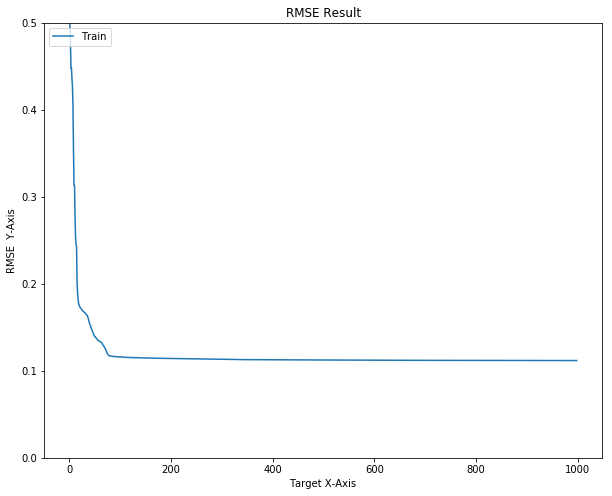

In [55]:
plt.figure(figsize=(10,8))
plt.plot(final_train_nn.ftrace)
plt.ylim(0,0.5)
plt.xlabel('Target X-Axis')
plt.ylabel('RMSE  Y-Axis')
plt.title('RMSE Result')
plt.legend(('Train','Test'),loc='upper left')

#### Confusion Matrix

In [56]:

from sklearn.metrics import confusion_matrix
cf=confusion_matrix(T_test ,predicted_values)
cf

array([[ 224, 5991],
       [ 243,  542]], dtype=int64)

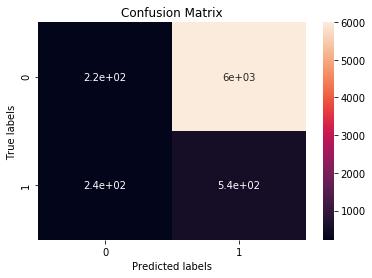

In [57]:
ax= plt.subplot()
sns.heatmap(cf, annot=True, ax = ax);
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix');

### IV. Results

#### Cross Validation Model Results

- The given is the CV result for Non Linear Regression for Regression Data: -
[13, 10.836465830069983], [8, 10.894808094304821], [9, 26.32381064683321], [8, 47.26511079335008], [9, 68.05337475298467]
- I have also plotted the actual and predicted ouput for each iteration of every fold so that we can visualize the correctness of the CV procedure.
- I have plotted the RMSE value in both Non Linear Regression data as well as Non Linear Logistic Regression Data. 
- We can say that from the iteration result and the plots the 4 th iteration was giving us the better result comparing to the other result.
- The given is the CV result for NonLinear Logistic Regression for Classification Data: -  
[10, 99.8612], [13, 99.2795], [8, 99.125], [23, 99.7952], [23, 99.14]
- For classification data one can find that the 3fold of data worked good for classification data. 
- One of the observation after executing data multiple time is the classification data gives better accuracy with multilayer Neural Network than a single layer linear model.

#### Discussions about parameter/network structure choice:

- I have actually given the layers variable as separate so that each iteration can be performed with a good accuracy 
- It was taking a lots of time when the hidden layer unit which was set at a high number. After reducing the value of hidden layer the algorithm was taking less time to execute.
- One of the other observation which I found was that the result of Regression was comparably high than that of classification data. 
- One of the other things which i found out was about the number attributes which is to be passed in to the CV. As the high number of attribute passing in the CV takes a lot of time for its execution and also the result tends to be less accurate. Therefore I have only given important features to my CV algorithm,


#### plots for results:

##### Non linear Regression model plots:

- As you can see in the plots of RMSE it starts from 0.5+ and get down below 0.2 and 0.1 for first 100 iteration of data points. And there after it remains in a constant state which is a good point for out neural network algorithm
- From the plotting of Test and Actual data plots we get to know that the pattern is being followed by our prediction data compared to the actual data. 

##### Non linear Logistic Regression model plots:

- For this model, you can see it repeats the result of our Non Linear Regression data. It tends to start with score of 0.5+ at the beginning of our iteration and then tends to be in a constant score of 0.2 and 0.1 score for remaining iterations. 
- Even in actual and predicted plot you can find that the pattern is being followed in our data.
- The accuracy is low 30 % but it follows the pattern.  RMS error is : 5821.530898311887 Accuracy is : 30.836281632653055 which are the result for our data. 

#### Discussion about the prediction results. Try to analyze what nonlinear regression model learn

- As we can see from our result in of rmse for NonLinear Regression model and Nonlinear Logistic regression model both tends to have a improved result with increase in number of iterations. If more the iteration more accurate is the result.
- But one of the things which I got to observe was the Regression data performed well for neural network than the classification data. 
- But the accuracy of neural network also depends on lot of other factors such as number of neurons, Activation function used, Number of hidden layers and also the data which we are providing. The results varies even if we change the attributes which we are passing to the neural network. 
- From previous assignments we have seen that the regression data always has the best accuracy compared to neural network. which is followed in this assignment as well
- In non-linear logistic regression, we first run the implementation on the toy data. As the implementation of the model runs successfully on the toy data, we apply the same on the classification data and analyze the results.
- One of the other observations is that the observation is sometime biased because of cross validation. i feel that because of cross validation I am getting one class of same data in one fold.  I think that this can be overcome if we have equal distributions of all the classes in the target variable.

### Conclusion

1. In general the theory was a little difficult to understand it took a lot of time to learn all the neural netowrk its working. 
2. Learnt the steepest gradient descent approach which is used in neural network.
3. Get to know multiple activation function which performs same thing but with different formulaes.
4. The cross validation method of taking random data set and checking which is best is one of the best emthod of selecting and testing data.



### Refrences

Nonlinear Neural Network's Notebook by Dr. Lee

Neural Networks notebook

Assignment 1 and Assignment 2 codes

Matplotlib. Retrieved from https://matplotlib.org/

Seaborn. Retrieved from https://seaborn.pydata.org/

YouTube [Video file]. (n.d.). Retrieved from https://www.youtube.com/watch?v=aircAruvnKk&t=1s

YouTube [Video file]. (n.d.). Retrieved from https://www.youtube.com/watch?v=IHZwWFHWa-w&t=554s

Where Developers Learn, Share, & Build Careers. (n.d.). Retrieved from https://stackoverflow.com/

And More
